<a href="https://colab.research.google.com/github/thedanindanger/yaads-examples/blob/dev/ColabIntro/SimpleSQLandRegressionExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)

Mounted at /content/gdrive/


#Downloading Data
Will use the database from a coding workshop I hosted a few years ago: https://github.com/thedanindanger/coreCodeConceptsWorkshop. It's a simple SQLite database. 

In [16]:
%cd '/content/gdrive/MyDrive/Articles/Coding Workshop for Accountants/repo/coreCodeConceptsWorkshop/data'

/content/gdrive/MyDrive/Articles/Coding Workshop for Accountants/repo/coreCodeConceptsWorkshop/data


In [17]:
!ls

classicmodels.db	 sqlitesampledatabase_limitedrows.sql
mysqlsampledatabase	 sqlitesampledatabase.sql
mysqlsampledatabase.sql


In [25]:
import sqlite3 as sql
import pandas as pd

srpt = open('./sqlitesampledatabase.sql', 'r').read()
conn = sql.connect('./classicmodels.db') #sqlite creates new db if not available
c = conn.cursor()
c.executescript(srpt)
conn.commit()
c.close()
conn.close()

In [27]:
#Connecting to now populated database
conn = sql.connect('./classicmodels.db')

#Write query to show tables. We read a meta data master file and get the names
qry = "SELECT name FROM sqlite_master WHERE type='table';"

#pandas makes it easier to read the query using the connection
#will print automatically

pd.read_sql_query(qry,conn)

,name
0,customers
1,employees
2,offices
3,orderdetails
4,orders
5,payments
6,productlines
7,products


In [34]:
#query to get first few office records from table
qry2 = 'select * from customers limit 10'
pd.read_sql_query(qry2,conn)

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370.0,21000
1,112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,None,Las Vegas,NV,83030,USA,1166.0,71800
2,114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611.0,117300
3,119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",None,Nantes,None,44000,France,1370.0,118200
4,121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,None,Stavern,None,4110,Norway,1504.0,81700
5,124,Mini Gifts Distributors Ltd.,Nelson,Susan,4155551450,5677 Strong St.,None,San Rafael,CA,97562,USA,1165.0,210500
6,125,Havel & Zbyszek Co,Piestrzeniewicz,Zbyszek,(26) 642-7555,ul. Filtrowa 68,None,Warszawa,None,01-012,Poland,NaN,0
7,128,"Blauer See Auto, Co.",Keitel,Roland,+49 69 66 90 2555,Lyonerstr. 34,None,Frankfurt,None,60528,Germany,1504.0,59700
8,129,Mini Wheels Co.,Murphy,Julie,6505555787,5557 North Pendale Street,None,San Francisco,CA,94217,USA,1165.0,64600
9,131,Land of Toys Inc.,Lee,Kwai,2125557818,897 Long Airport Avenue,None,NYC,NY,10022,USA,1323.0,114900


In [31]:
#query to get first few office records from table
qry3 = 'select * from orderdetails limit 10'
pd.read_sql_query(qry3,conn)

,orderNumber,productCode,quantityOrdered,priceEach,orderLineNumber
0,10100,S18_1749,30,136.00,3
1,10100,S18_2248,50,55.09,2
2,10100,S18_4409,22,75.46,4
3,10100,S24_3969,49,35.29,1
4,10101,S18_2325,25,108.06,4
5,10101,S18_2795,26,167.06,1
6,10101,S24_1937,45,32.53,3
7,10101,S24_2022,46,44.35,2
8,10102,S18_1342,39,95.55,2
9,10102,S18_1367,41,43.13,1


# Making it even easier with Magics
'Magics' modify lines or cells in a notebook.
If you set them up yourself, they can be a little tricky.
Fortunately, Colab has them built in.

In [32]:
%load_ext sql
%config SqlMagic.displaycon = False
%config SqlMagic.feedback = False
%sql sqlite:///classicmodels.db

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Config option `displaycon` not recognized by `SqlMagic`.  Did you mean `displaylimit`?
  


'Connected: @classicmodels.db'

In [33]:
%%sql
select 
  *
from orderdetails 
limit 10

 * sqlite:///classicmodels.db


orderNumber,productCode,quantityOrdered,priceEach,orderLineNumber
10100,S18_1749,30,136,3
10100,S18_2248,50,55.09,2
10100,S18_4409,22,75.46,4
10100,S24_3969,49,35.29,1
10101,S18_2325,25,108.06,4
10101,S18_2795,26,167.06,1
10101,S24_1937,45,32.53,3
10101,S24_2022,46,44.35,2
10102,S18_1342,39,95.55,2
10102,S18_1367,41,43.13,1


# Setting up a demo dataset
Now let's pull together some data to do a quick analysis.
Something like "For United States Customers, do certain ZIP codes have a high propensity to purchase than others?"

First, we need to see if there are enough purchases to merit such an analysis.

(The 'zip_orders_df <<' at the top is how to assign the query output to a variable.)

In [63]:
%%sql zip_orders <<
select 
  state,
  postalCode,
  count(distinct c.customerNumber) as unique_customers,
  sum(od.quantityOrdered) as quantity_ordered,
  sum(od.quantityOrdered * od.priceEach) as amount_purchased

from 
  customers as c
  left join 
  orders as o
  on c.customernumber = o.customernumber
  left join 
  orderdetails as od
  on o.orderNumber = od.orderNumber
  where c.country = 'USA'
group by 
  state,
  postalCode


 * sqlite:///classicmodels.db
Returning data to local variable zip_orders


In [64]:
#convert the sql output to a data frame
zip_orders_df = pd.DataFrame([dict(r) for r in zip_orders])
zip_orders_df

,state,postalCode,unique_customers,quantity_ordered,amount_purchased
0,CA,90003,1,1060,93803.30
1,CA,91003,1,500,41506.19
2,CA,91217,1,954,80375.24
3,CA,92561,1,102,7918.60
4,CA,94019,1,511,43748.72
5,CA,94217,5,5488,489703.20
6,CA,97562,1,6366,591827.34
7,CT,97561,1,666,49967.78
8,CT,97562,1,903,95424.63
9,CT,97823,2,636,70378.65


# Normalizing by population
There are not a lot of customers, so this is not by any means a legit analysis; however, we are only doing a sample.

We can move forward with performing the analysis as an illustrative exercise, keeping in mind it will not have meaningful results.

Let us just treat the quantity ordered as if it was a number of customers who all purchased the same thing.

Since we are analyzing at a state level, we need to adjust the purchases based on the size of each state.

Fortunately, we have BigQuery census data for this.

In [55]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [56]:
#You need to have a project set up in bigquery, even though this analysis is well within the monthly free allowance
project_id = '<your-project-id>'

In [57]:
#Enable datatable viewing and bigquery magics

%load_ext google.colab.data_table

#%unload_ext google.colab.data_table

In [59]:
%%bigquery --project $project_id zip_pop_df
SELECT 
  --Forces leading zeros, e.g. ZIP 34 would first concat to 0000034,
  --  Then the right five are 00034
  right(concat('00000' ,cast(zipcode as string)),5) as zip_5, 
  sum(population) as population 
 FROM `bigquery-public-data.census_bureau_usa.population_by_zip_2010` 
 GROUP BY 1

In [60]:
zip_pop_df

,zip_5,population
0,00601,55710
1,00602,124560
2,00603,164067
3,00606,19845
4,00610,87048
...,...,...
33115,99923,261
33116,99925,2457
33117,99926,4380
33118,99927,282


In [65]:
zip_orders_pop_df = pd.merge(zip_orders_df,zip_pop_df, left_on='postalCode', right_on='zip_5', how='left')

In [66]:
zip_orders_pop_df

,state,postalCode,unique_customers,quantity_ordered,amount_purchased,zip_5,population
0,CA,90003,1,1060,93803.30,90003,198798.0
1,CA,91003,1,500,41506.19,NaN,NaN
2,CA,91217,1,954,80375.24,NaN,NaN
3,CA,92561,1,102,7918.60,92561,4983.0
4,CA,94019,1,511,43748.72,94019,55272.0
5,CA,94217,5,5488,489703.20,NaN,NaN
6,CA,97562,1,6366,591827.34,NaN,NaN
7,CT,97561,1,666,49967.78,NaN,NaN
8,CT,97562,1,903,95424.63,NaN,NaN
9,CT,97823,2,636,70378.65,97823,2844.0


#Imputing missing data
For some reason, BigQuery's 2010 full census data did not have several of the States and the ZIPs were not present in the small sample sized ACS annual surveys either.

So we will need to use some other measure or exclude the records. Because this is only for an example, I will just take the average population per known ZIP code within each state.

In [67]:
%%bigquery --project $project_id state_pop_df
SELECT 
  state_zip.state_code,
  avg(pop.total_pop) as population 
 FROM `bigquery-public-data.geo_us_boundaries.zip_codes` as state_zip
 left join 
  `bigquery-public-data.census_bureau_acs.zip_codes_2018_5yr` as pop
  on state_zip.zip_code = right(concat('00000' ,cast(geo_id as string)),5)
 GROUP BY 1
 order by 1 

In [68]:
zip_state_orders_pop_df = pd.merge(zip_orders_pop_df ,state_pop_df, left_on='state', right_on='state_code', how='left')

In [69]:
zip_state_orders_pop_df

,state,postalCode,unique_customers,quantity_ordered,amount_purchased,zip_5,population_x,state_code,population_y
0,CA,90003,1,1060,93803.30,90003,198798.0,CA,22200.972206
1,CA,91003,1,500,41506.19,NaN,NaN,CA,22200.972206
2,CA,91217,1,954,80375.24,NaN,NaN,CA,22200.972206
3,CA,92561,1,102,7918.60,92561,4983.0,CA,22200.972206
4,CA,94019,1,511,43748.72,94019,55272.0,CA,22200.972206
5,CA,94217,5,5488,489703.20,NaN,NaN,CA,22200.972206
6,CA,97562,1,6366,591827.34,NaN,NaN,CA,22200.972206
7,CT,97561,1,666,49967.78,NaN,NaN,CT,12700.368794
8,CT,97562,1,903,95424.63,NaN,NaN,CT,12700.368794
9,CT,97823,2,636,70378.65,97823,2844.0,CT,12700.368794


In [80]:
zip_state_orders_pop_df['pop_impute'] =\
  zip_state_orders_pop_df\
  .apply(lambda x: x['population_y'] if pd.isnull(x['population_x'])\
  else x['population_x'], axis=1)

In [81]:
zip_state_orders_pop_df['orders_norm'] =\
  zip_state_orders_pop_df['quantity_ordered'] / zip_state_orders_pop_df['pop_impute']

In [82]:
columns = ['postalCode', 'orders_norm']
zip_state_orders_pop_df[columns]

,postalCode,orders_norm
0,90003,0.005332
1,91003,0.022522
2,91217,0.042971
3,92561,0.020470
4,94019,0.009245
5,94217,0.247196
6,97562,0.286744
7,97561,0.052439
8,97562,0.071100
9,97823,0.223629


from pandas.core.internals.construction import treat_as_nested
#Building a simple model
Now that we have something to work with, let us make a simple model.

Nothing too serious, just a simple regression treat_as_nested

In [99]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
import numpy as np

In [91]:
#Get our input and output variables
input_cols = ['postalCode']
output_cols = ['orders_norm']
input = zip_state_orders_pop_df[input_cols]
output = zip_state_orders_pop_df[output_cols]

#transform to array and add dimension since it's only a single variable
input_array = np.array(input).reshape(-1,1)
output_array = np.array(output)

model = DecisionTreeRegressor(random_state=42)
model.fit(input_array,output_array)

DecisionTreeRegressor(random_state=42)

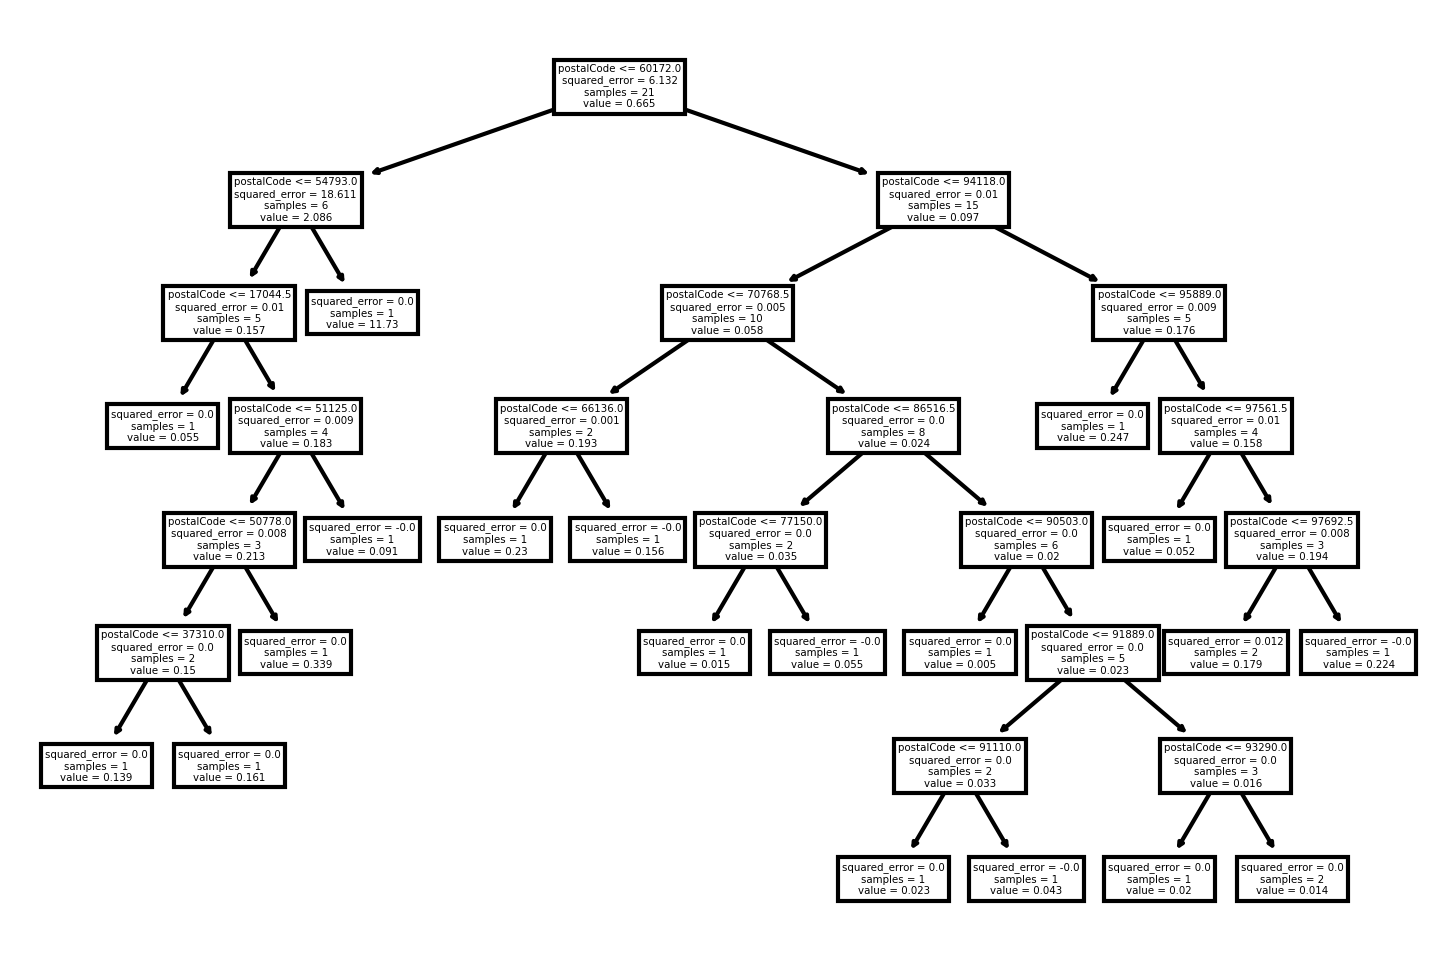

In [113]:
plt.figure(figsize=(6, 4), dpi=300)
plot_tree(model, feature_names= input_cols)
plt.show()
